a_initial=  83.7497888184472
Evolving from  581595755683661.1  to  1.0 r_isco  with initial eccentricity 0.999999499999875  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08


/home/pratibhajangra/Desktop/Modified Work/imripy-main/src/imripy/inspiral.py:534: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  t_coal = t_coal * 48./19. / g(e_0)**4 * quad(lambda e: g(e)**4 *(1-e**2)**(5./2.) /e/(1. + 121./304. * e**2), 0., e_0, limit=100)[0]   # The inspiral time according to Maggiore (2007)
/home/pratibhajangra/Desktop/Modified Work/imripy-main/src/imripy/inspiral.py:335: RuntimeWarning: invalid value encountered in sqrt
  v_s = np.sqrt(sp.m_total(a) *(2./r - 1./a))
/home/pratibhajangra/Desktop/Modified Work/imripy-main/src/imripy/halo.py:321: RuntimeWarning: invalid value encountered in double_scalars
  return np.where(r > self.r_min, self.rho_spike * (self.r_spike/r)**self.alpha, 0.)
/home/pratibhajangra/Desktop/Modified Work/imripy-main/src/imripy/inspiral.py:337: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 

Required step size is less than spacing between numbers.
 -> Evolution took 5.7104s
here
Evolving from  581595755683661.1  to  1.0 r_isco  with initial eccentricity 0.9999992874484109  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 4.3950s
here
Evolving from  581595755683661.1  to  1.0 r_isco  with initial eccentricity 0.999998984540674  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 3.2512s
here
Evolving from  581595755683661.1  to  1.0 r_isco  with initial eccentricity 0.9999985528658906  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 3.1136s
here
Evolving from  581595755683661.1  to  1.0 r_isco  with initial eccentricity 0.999997937684682

/home/pratibhajangra/Desktop/Modified Work/imripy-main/src/imripy/merger_system.py:202: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((self.mass(r) + self.m2)/r**3)


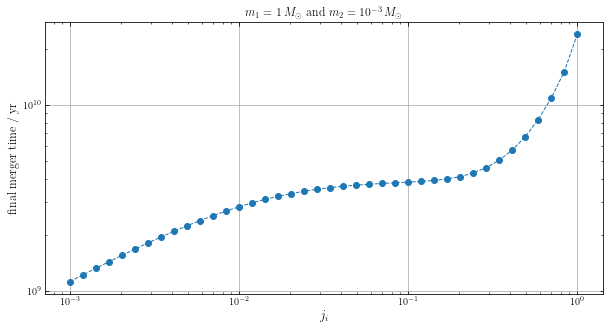

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imripy
from imripy import merger_system as ms
from scipy.interpolate import interp1d
from matplotlib.ticker import FormatStrFormatter
from scipy.optimize import curve_fit
from scipy.interpolate import InterpolatedUnivariateSpline
from numpy import diff
import mass_function
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})


π = np.pi
Ω_cdm = 0.85
G = 4.4959e-15            #in units of M☉^-1 pc^3 yr^-2
c = 0.3068                #in units of pc yr^-1
ρ_eq = 3.1808e3           #in units of M☉ pc^-3 with ρ_eq = 2.1548e-16 kg m^-3
t_m = 13.78e9             #in units of yrs corresponding to t_0 = 13.78 Gyr
yr = 3.154e7              # in units of seconds
t_eq = 1.5923e12/yr      # in units of yr
M_solar = 1.989e30

# t_m as a function of j_i for the range of PBH masses from m_min = 1e-4 M☉ - m_max = 100 M☉ using
# mass function of the paper https://arxiv.org/abs/2207.07576 . 


# Definition of the reference binary system with m_1 = 1 M☉ and m_2 = 1e-3 M☉.
bin_centres = np.geomspace(1e-3, 1, 5)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])


ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 


deltas = np.diff(bin_edges)
Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()

m_1 = np.geomspace(1e-3, 1, 5)
m_2 = np.geomspace(1e-3, 1, 5)
m_1_list = m_1.tolist()
m_2_list = m_2.tolist()   


    
def a(m_1,m_2,Δ_1,Δ_2):  # for x = x_bar 
    
    f_pbh = mass_function.f_PBH      
    f = 0.85*f_pbh
   
    def P(m):    #in units of M☉, for PBHs mass range of m_min = 1e-4 M☉ - m_max = 100 M☉ 
        return mass_function.new_PDF(m)

    
    def f_(m):
        return f*P(m)
    
    def f_b(m_1,m_2):
        return  f_(m_1)+f_(m_2)
    
    def x̄(m_1,m_2,Δ_1,Δ_2):
        return (((3*(m_1+m_2))/(4*π*ρ_eq*f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2)))**(1/3))
   
    def λ(m_1,m_2,Δ_1,Δ_2):
        return (4*π*ρ_eq*(x̄(m_1,m_2,Δ_1,Δ_2)**3))/(3*(m_1 + m_2))

    
    return (0.0977*λ(m_1,m_2,Δ_1,Δ_2) + 0.0068*(λ(m_1,m_2,Δ_1,Δ_2)**2) ) * x̄(m_1,m_2,Δ_1,Δ_2)





a_initial = a(m_1_list[-1], m_2_list[0], Δ_1_list[-1], Δ_2_list[0])


print("a_initial= ", a_initial)


# Setting initial and final conditions of the binary evolution for an eccentric orbit
a_i_ref = a_initial * 2
j0_array = np.geomspace(1e-3, 1, 40)
j0_ref_list_1 = j0_array.tolist()


plt.figure(figsize = (10, 5))
plt.rc('lines', linewidth=1)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(which='both', right=True, top=True)



tm_ref_list_1 = np.zeros(len(j0_ref_list_1))
T_list = np.zeros(len(j0_ref_list_1))


for k, j0 in enumerate (j0_ref_list_1):
    m_bar = 1
    m1 =  m_bar * ms.solar_mass_to_pc  
    m2 = 1e-3 * ms.solar_mass_to_pc   
    D_luminosity = 5e8              
    ρ_bar = (1/2) * (ρ_eq * Ω_cdm) * (t_eq**(3/2)) * ((2*G*m_bar)**(3/4))   
    r_spike = 1  # in parsecs, Choosen by choice
    alpha = 9/4
    rho_spike =  ρ_bar * (r_spike**(-alpha)) * ms.solar_mass_to_pc  
    spike = imripy.halo.Spike(rho_spike, r_spike, alpha)
    sp = ms.SystemProp(m1, m2, spike, D_luminosity)
    a_fin = sp.r_isco()      # Choosen equal to r_icso
    R_fin = sp.r_isco()      # The final condition for the evolution
    e0 = np.sqrt(1 -(j0**2))
    
    
    m_2_ref = 1 # in units of solar mass
    T = 5e-6 * (t_m * ms.year_to_pc ) * ((m2/m_2_ref)**(-1))
    
    ev_ecc = imripy.inspiral.Classic.Evolve(sp, a_i_ref , e0,  a_fin = R_fin, t_fin = T)
    tm = ev_ecc.t[-1]
    
    print("here")
    while np.isclose(T, tm) == True: 
        T = T * 10
        ev_ecc = imripy.inspiral.Classic.Evolve(sp, a_i_ref, e0,  a_fin = R_fin, t_fin = T)
        tm = ev_ecc.t[-1]
        
            
            
    tm_ref_list_1[k] = tm/ms.year_to_pc
    T_list[k] =  T/ms.year_to_pc
      
    np.savez("tmofj0_ref_multipeak_1",  j0_ref_list_1,  tm_ref_list_1)

plt.loglog(j0_ref_list_1, tm_ref_list_1, '--o')
print(tm_ref_list_1)
plt.xlabel('$j_{i}$', fontsize = 13)
plt.ylabel('final merger time / yr', fontsize = 12)
plt.title('$m_{1} = 1 \, M_{\odot}$ and $m_{2}= 10^{-3} \,  M_{\odot}$ ')
plt.grid()
plt.show()

Slope and intercept of fitting function = [ 0.46499179 24.05013516]


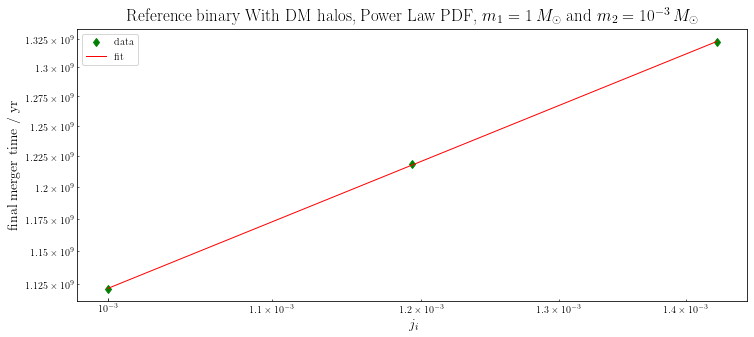

In [2]:
plt.figure(figsize = (12, 5))

x  = (j0_ref_list_1[0], j0_ref_list_1[1], j0_ref_list_1[2] )
y  = (tm_ref_list_1[0], tm_ref_list_1[1], tm_ref_list_1[2])

plt.loglog(x,y,'gd',  label='data')

p = np.polyfit(np.log(x),np.log(y),1)  # F(x) = (x**m)(10**b) with m = slope, b = intercept.
z = np.polyval(p,np.log(x))
plt.loglog(x, np.exp(z), 'r',  label='fit')
print("Slope and intercept of fitting function =", p) 

plt.xlabel('$j_{i}$', fontsize = 14)
plt.ylabel('final merger time / yr', fontsize = 14)
plt.title('Reference binary With DM halos, Power Law PDF, $m_{1} = 1 \, M_{\odot}$ and $m_{2}= 10^{-3} \,  M_{\odot}$ ', fontsize = 17, pad = 9)
plt.legend()
plt.show()


# So, the fitting function is t_final_mergertime = (10**(24.05/np.log(10)))  * (j0**0.465)  


j0_lower_values = [1e-06, 2.1293603732376627e-06, 4.534175599114847e-06, 9.654893846056293e-06, 2.0558748363608484e-05, 4.377698408883255e-05, 9.321697517861568e-05, 0.00019849253305842323, 0.0004226621342781736, 0.0009]

final merger time / yr = [4.51629487e+07 6.41827251e+07 9.12124279e+07 1.29625331e+08
 1.84215319e+08 2.61795155e+08 3.72046709e+08 5.28729243e+08
 7.51396545e+08 1.06783723e+09]


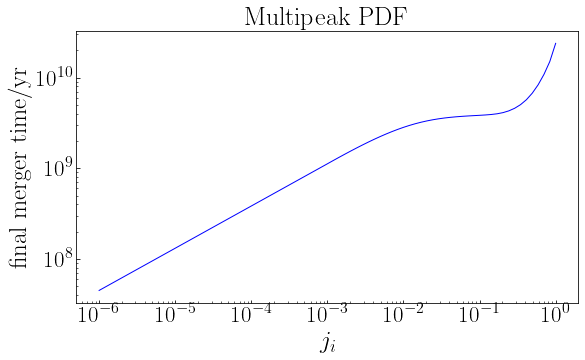

In [4]:
ji_array_1b = np.geomspace(1e-6, 9e-4, 10)
ji_ref_list_1b = ji_array_1b.tolist()

m = 0.465
b = 24.05/np.log(10)

def t_final_merger(j0):
    return   (j0**m) * (10**b)



tm_ref_list_1b = np.zeros(len(ji_ref_list_1b))

for i, j0 in enumerate(ji_ref_list_1b):
    tm_ref_list_1b[i] = t_final_merger(j0)
    


print("j0_lower_values =", ji_ref_list_1b)
print('\v')
print("final merger time / yr =", tm_ref_list_1b)


file = np.load('tmofj0_ref_multipeak_1.npz')
ji_ref_list_1 = file['arr_0']
tm_ref_list_1 = file['arr_1']



ji_ref_multipeak_list = np.append(ji_ref_list_1b, ji_ref_list_1) 
tm_ref_multipeak_list =  np.append( tm_ref_list_1b, tm_ref_list_1) 
a_initial =  83.74978 #in units of pc
a_i_ref_multipeak = a_initial * 2   #in units of pc


np.savez("tmofj0_ref_multipeak", m, b, a_i_ref_multipeak, ji_ref_multipeak_list , tm_ref_multipeak_list)

plt.figure(figsize = (9, 5))
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.loglog(ji_ref_multipeak_list, tm_ref_multipeak_list, 'b')
plt.xlabel('$j_{i}$', fontsize = 25)
plt.ylabel('final merger time/yr', fontsize = 25)
plt.title('Multipeak PDF', fontsize = 26)
plt.show()

In [5]:
from scipy.interpolate import InterpolatedUnivariateSpline


def f_tm_of_j0(j0, a0, m1, m2):
    beta = 0.75
    gamma  =  0.65
    delta = -0.89
    a_i_ref = (a_initial * 2)  # in units of pc with a_initial = 83.74978 pc
    m1_ref = 1      # in units of solar mass.
    m2_ref = 1e-3   # in units of solar mass.
    spl =  InterpolatedUnivariateSpline(ji_ref_multipeak_list, tm_ref_multipeak_list, ext = 2)
    return spl(j0) * ((a0/a_i_ref)**(beta)) * ((m1 /m1_ref)**(gamma)) * ((m2 /m2_ref)**(delta))


 a_i =  70.78822923369513
Evolving from  24579246261.699703  to  1.0 r_isco  with initial eccentricity 0.999  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08


/home/pratibhajangra/Desktop/Modified Work/imripy-main/src/imripy/inspiral.py:153: RuntimeWarning: invalid value encountered in double_scalars
  return -32./5. * sp.m_reduced(a)**2 * sp.m_total(a)**3 / a**5  / (1. - e**2)**(7./2.) * (1. + 73./24. * e**2 + 37./96. * e**4)
/home/pratibhajangra/Desktop/Modified Work/imripy-main/src/imripy/inspiral.py:337: RuntimeWarning: invalid value encountered in double_scalars
  return -(1.-e**2)**(3./2.)/2./np.pi * quad(integrand, 0., 2.*np.pi, limit = 100)[0]
/home/pratibhajangra/Desktop/Modified Work/imripy-main/src/imripy/inspiral.py:335: RuntimeWarning: invalid value encountered in sqrt
  v_s = np.sqrt(sp.m_total(a) *(2./r - 1./a))
/home/pratibhajangra/Desktop/Modified Work/imripy-main/src/imripy/halo.py:321: RuntimeWarning: invalid value encountered in double_scalars
  return np.where(r > self.r_min, self.rho_spike * (self.r_spike/r)**self.alpha, 0.)
/home/pratibhajangra/Desktop/Modified Work/imripy-main/src/imripy/inspiral.py:337: IntegrationWa

Required step size is less than spacing between numbers.
 -> Evolution took 5.0909s
Evolving from  24579246261.699703  to  1.0 r_isco  with initial eccentricity 0.9988746644173992  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 5.1848s
Evolving from  24579246261.699703  to  1.0 r_isco  with initial eccentricity 0.9987336198265326  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08


/home/pratibhajangra/Desktop/Modified Work/imripy-main/src/imripy/inspiral.py:172: RuntimeWarning: invalid value encountered in double_scalars
  return -32./5. * sp.m_reduced(a)**2 * sp.m_total(a)**(5./2.) / a**(7./2.)  / (1. - e**2)**2 * (1. + 7./8.*e**2)


Required step size is less than spacing between numbers.
 -> Evolution took 3.3337s
Evolving from  24579246261.699703  to  1.0 r_isco  with initial eccentricity 0.998574897329697  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 3.3469s
Evolving from  24579246261.699703  to  1.0 r_isco  with initial eccentricity 0.9983962812562487  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 3.2602s
Evolving from  24579246261.699703  to  1.0 r_isco  with initial eccentricity 0.9981952782331728  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 3.1715s
Evolving from  24579246261.699703  to  1.0 r_isco  with initial eccentricity 0.9979690823790953  with  Options

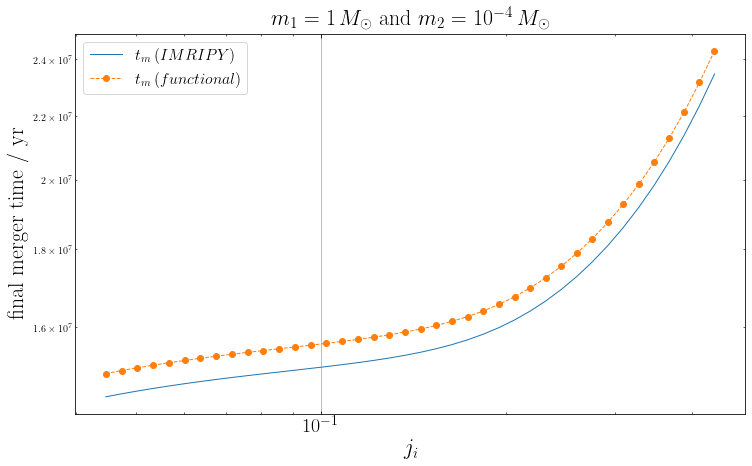

In [6]:
bin_centres = np.geomspace(1e-4, 1, 5)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])


ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 


deltas = np.diff(bin_edges)
Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()


m_1_list = np.geomspace(1e-4, 1, 5)
m_2_list = np.geomspace(1e-4, 1, 5)

m_1 = m_1_list[-1]
m_2 = m_2_list[0]
   

        
def a(m_1,m_2,Δ_1,Δ_2):  # for x =  x_bar 
    
    f_pbh = mass_function.f_PBH      
    f = 0.85*f_pbh
   
    def P(m):    #in units of M☉, for PBHs mass range of m_min = 1e-4 M☉ - m_max = 100 M☉ 
        return mass_function.new_PDF(m)

    def f_(m):
        return f*P(m)
    
    def f_b(m_1,m_2):
        return  f_(m_1)+f_(m_2)
    
    def x̄(m_1,m_2,Δ_1,Δ_2):
        return (((3*(m_1+m_2))/(4*π*ρ_eq*f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2)))**(1/3))
   
    def λ(m_1,m_2,Δ_1,Δ_2):
        return (4*π*ρ_eq*(x̄(m_1,m_2,Δ_1,Δ_2)**3))/(3*(m_1 + m_2))

    
    return ( 0.0977*λ(m_1,m_2,Δ_1,Δ_2) + 0.0068*(λ(m_1,m_2,Δ_1,Δ_2)**2) ) * x̄(m_1,m_2,Δ_1,Δ_2)


a_i = a(m_1_list[-1], m_2_list[0], Δ_1_list[-1], Δ_2_list[0])
print(" a_i = ", a_i)


# Setting initial and final conditions of the binary evolution for an eccentric orbit


plt.figure(figsize = (12, 7))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(which='both', right=True, top=True)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)


e0_array = 1- np.geomspace(1e-3, 0.1, 40) 
e0_list = e0_array.tolist()


t_m_list = np.zeros(len(e0_list))
t_m1_list = np.zeros(len(e0_list))
j0_list = np.zeros(len(e0_list))



for k, e0 in enumerate (e0_list): 
    m_bar = 1
    m1 =  m_bar * ms.solar_mass_to_pc      
    m2 = 1e-4 * ms.solar_mass_to_pc        
    D_luminosity = 5e8                     
    ρ_bar = Ω_cdm * (ρ_eq/2) * (t_eq**(3/2)) * ((2 * G * m_bar)**(3/4))
    r_spike = 1                            # in parsecs, Choosen by choice
    alpha = 9/4
    rho_spike =  ρ_bar * (r_spike**(-alpha)) * ms.solar_mass_to_pc              # This takes the value of M_sun/pc^3 and converts it to 1/pc^2
    spike = imripy.halo.Spike(rho_spike, r_spike, alpha)
    sp = ms.SystemProp(m1, m2, spike, D_luminosity)
    a0 = a_i * 1e-4
    a_fin = sp.r_isco()      # Choosen equal to r_icso
    R_fin = sp.r_isco()      # The final condition for the evolution
    ev_ecc = imripy.inspiral.Classic.Evolve(sp, a0 , e0,  a_fin = R_fin)
    t_m_list[k] =  ev_ecc.t[-1]/ms.year_to_pc
    j0_list[k]  =  np.sqrt(1 - (e0**2))
    t_m1_list[k] = f_tm_of_j0(j0_list[k] , a0,  1, 1e-4)
plt.loglog(j0_list, t_m_list, '')
plt.loglog(j0_list, t_m1_list, '--o')   


plt.legend([ "$t_{m} \, (IMRIPY)$","$t_{m} \, (functional)$"], loc = 'upper left', prop = {"size":16})
plt.xlabel('$j_{i}$', fontsize = 22)
plt.ylabel('final merger time / yr', fontsize = 22)
plt.title('$m_{1} = 1 \, M_{\odot}$ and $m_{2}= 10^{-4} \, M_{\odot}$ ', fontsize = 22, pad = 9)
plt.grid()
plt.savefig('t_m_check.pdf')
plt.show()

In [7]:
def percentage_error(numerical, fitted): 
    return (np.abs((numerical - fitted) / numerical)) * 100


error_list=np.zeros(len(e0_list))
for i, (t_m,t_m1) in enumerate(zip(t_m_list,t_m1_list)):
    error_list[i] = percentage_error(t_m, t_m1)    #Percentage error 


error_max=np.max(error_list)
print("Maximum Percentage error= "'%0.4f'%error_max,"%")

Maximum Percentage error= 3.5708 %


In [9]:
a_i_ref = 83.7497888184472 * 2
a_i_ref

167.4995776368944